$\Large\textbf{1. Overview}$

Keras separates the concerns of saving your model architecture and saving your model weights.

Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.

The model structure can be described and saved using two different formats: JSON and YAML.

In this post we are going to look at two examples of saving and loading your model to file:

Save Model to JSON.
Save Model to YAML.
Each example will also demonstrate saving and loading your model weights to HDF5 formatted files.

The examples will use the same simple network trained on the Pima Indians onset of diabetes binary classification dataset. This is a small dataset that contains all numerical data and is easy to work with. You can download this dataset and place it in your working directory with the filename “pima-indians-diabetes.csv”. 

In [1]:
#Tutorial from https://machinelearningmastery.com/save-load-keras-deep-learning-models/
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.utils.vis_utils import plot_model
from IPython.display import Image
import numpy
import os

Using TensorFlow backend.


$\Large\textbf{2. Save Your Neural Network Model to JSON}$

JSON is a simple file format for describing data hierarchically.

Keras provides the ability to describe any model using JSON format with a **to_json()** function. This can be saved to file and later loaded via the **model_from_json()** function that will create a new model from the JSON specification.

The weights are saved directly from the model using the **save_weights()** function and later loaded using the **load_weights()** function.

The example below trains and evaluates a simple model on the Pima Indians dataset. The model is then converted to JSON format and written to **model.json** in the local directory. The network weights are written to **model.h5** in the local directory.

The model and weight data is loaded from the saved files and a new model is created. It is important to compile the loaded model before it is used. This is so that predictions made using the model can use the appropriate efficient computation from the Keras backend.

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 76.43%


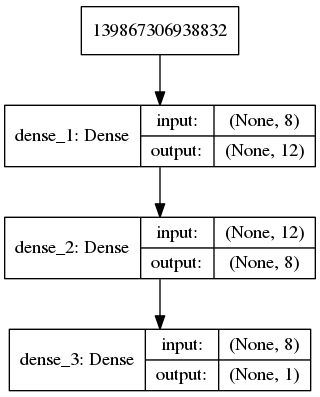

In [3]:
plot_model(model, to_file='temp.png', show_shapes=True, show_layer_names=True)
Image("temp.png")

In [4]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [5]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [6]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 76.43%


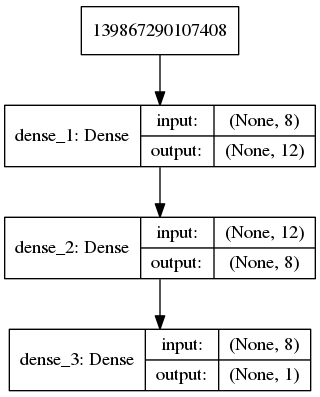

In [7]:
plot_model(loaded_model, to_file='temp_json.png', show_shapes=True, show_layer_names=True)
Image("temp_json.png")